# Look at the fits with individual spectra

In [1]:
import numpy as np
import pyspeckit
import matplotlib.pyplot as plt
from astropy.io import fits
from spectral_cube import SpectralCube
import os
import sys
from astropy.io import fits
from astropy.wcs import WCS
sys.path.append('../')
from setup import *
from AICfunc import *
import astropy.units as u
from astropy.modeling.models import Gaussian1D

In [2]:
fitfile1 = fitfilebase.format(1) + '_2_filtered.fits'
fitfile2 = fitfilebase.format(2) + '_2_filtered.fits'
specfile = hc3n_10_9_cube_s+ '_K.fits'
ncomponentsfile = fitdir + 'diagnosticAIC/ncomponents_AIC.fits'
aicmapfile1 = fitdir + 'diagnosticAIC/AIC_values_models_1G.fits'
aicmapfile2 = fitdir + 'diagnosticAIC/AIC_values_models_2G.fits'
xstart = 232
ystart = 249

In [23]:
cube = SpectralCube.read(specfile)
spectrum = cube.unmasked_data[:, ystart, xstart]
vel = cube.spectral_axis

rmsmap = fits.getdata(rmsfile)
ncomponentsmap = fits.getdata(ncomponentsfile)
aicmap1 = fits.getdata(aicmapfile1)
aicmap2 = fits.getdata(aicmapfile2)

SyntaxError: EOL while scanning string literal (4040405565.py, line 6)

In [4]:
params1G = fits.getdata(fitfile1)[:3]
params2G = fits.getdata(fitfile2)[:6]
rms = rmsmap[ystart, xstart]
ncomp = ncomponentsmap[ystart, xstart]
print(ncomp)
print(aicmap1[ystart, xstart], aicmap2[ystart, xstart]) #404.41937255859375 465.8998718261719

1.0
404.41937255859375 465.8998718261719


In [5]:
params1Gspec = params1G[:, ystart, xstart]
params2Gspec = params2G[:, ystart, xstart]

In [6]:
g1spec = Gaussian1D(amplitude=params1Gspec[0]*u.K, mean=params1Gspec[1]*u.km/u.s, stddev=params1Gspec[2]*u.km/u.s)
g2spec = Gaussian1D(amplitude=params2Gspec[0]*u.K, mean=params2Gspec[1]*u.km/u.s, stddev=params2Gspec[2]*u.km/u.s) + \
Gaussian1D(amplitude=params2Gspec[3]*u.K, mean=params2Gspec[4]*u.km/u.s, stddev=params2Gspec[5]*u.km/u.s)


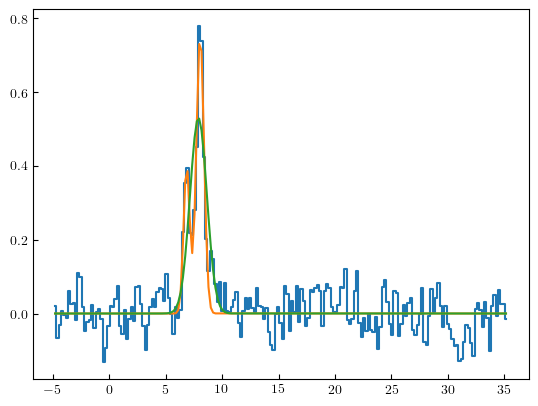

In [7]:
plt.clf()
plt.plot(vel, spectrum, drawstyle='steps-mid')
plt.plot(vel, g2spec(vel))
plt.plot(vel, g1spec(vel))

In [8]:

aic1G, chi1G = AIC(spectrum.value, g1spec(vel).value, rms, 3)
aic2G, chi2G = AIC(spectrum.value, g2spec(vel).value, rms, 6)


In [9]:
#open interactive panel

print(aic1G, aic2G)



261.9849266376603 187.45963613647513


In [16]:
spc = pyspeckit.Cube(cube=cube)

In [36]:
spc.load_model_fit(fitfile1, npars=3, npeaks=1, fittype='gaussian')
fittedmodels1 = spc.get_modelcube()
fittedmodel1 = fittedmodels1[:, ystart, xstart]


NaN or infinite values encountered in parameter cube.


INFO: Left region selection unchanged.  xminpix, xmaxpix: 0,195 [pyspeckit.spectrum.interactive]
INFO: Left region selection unchanged.  xminpix, xmaxpix: 0,195 [pyspeckit.spectrum.interactive]


In [42]:
aic1gspc, chi1gspc = AIC(spectrum.value, fittedmodel1, rms, 3)

In [43]:
aic1gspc

261.9849266376603

In [33]:
ystart in ylist


True